<a href="https://colab.research.google.com/github/nhwhite212/DealingwithDataSpring2021/blob/colab/6-Pandas/A-Introduction_to_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We start this notebook by typing a "magic" command that allows iPython notebooks to display plots directly in the browser.

In [1]:
# Render our plots inline
%matplotlib inline


In order to read and process files, we are going to use a very powerful, and widely used Python library, called pandas. So, our next step is to import the pandas library in Python, and also import the library matplotlib for generating plots:

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

Pandas should already be installed on your machine, but if you get an error in the import statement above, indicating that pandas is not available, please uncomment the following command and execute:

In [3]:
#!sudo python3 -m pip install -U pandas

And we type some code to simply change the visual style of the plots. (The code below is optional and not necessary, and for now you do not need to understand what exactly is happening.)

In [4]:
# Make the graphs a bit bigger
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])

### Basic Example: Creating a DataFrame from Scratch

This is an example of creating a dataframe by passing a list of dictionaries.

In [5]:
df = pd.DataFrame([ 
    {"First Name": "Norman", "Last Name":" White"},
    {"First Name": "John", "Last Name":" Doe"},
    {"Last Name":"Trump"}
])


In [6]:
df

,First Name,Last Name
0,Norman,White
1,John,Doe
2,NaN,Trump


### Reading Data Files

Let's take a look at the restaurant inspections file (at `data/restaurants.csv`), which we used in our earlier classes.

If you do not have it, then uncomment and execute the following:

In [13]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [14]:

!curl 'http://people.stern.nyu.edu/nwhite/DealingwithDataSpring2021/data/restaurant.csv.gz' -o data/restaurant.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 34.2M  100 34.2M    0     0   303k      0  0:01:55  0:01:55 --:--:--  303k


In [9]:
# !rm data/restaurant.csv.gz
# !gzip data/restaurant.csv

In [15]:
!gzip -cd data/restaurant.csv.gz | head -3

CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
40638039,LEGENDS BAR & GRILL,Queens,7104,35 AVENUE,11372,7188999553,American,03/25/2019,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.",Y,10,A,03/25/2019,10/26/2019,Cycle Inspection / Initial Inspection,40.750719368488,-73.894733598464,403,25,029100,4029524,4012710101,QN28
40577241,ROYAL BAKERY & ROTI SHOP,Brooklyn,618,NOSTRAND AVENUE,11216,7186040200,Caribbean,02/27/2017,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.,N,9,A,02/27/2017,10/26/201

### Reading a CSV file

We want to be able to read and process this file within Python. The pandas library has a very convenient method `read_csv` which reads the file, and returns back a variable that contains its contents.

In [16]:
import pandas as pd
restaurants = pd.read_csv("data/restaurant.csv.gz", encoding="utf-8", dtype="unicode")

When you read a CSV, you get back a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary. Let's take a look at how the object looks like:

In [17]:
restaurants.head(5)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,40638039,LEGENDS BAR & GRILL,Queens,7104,35 AVENUE,11372,7188999553,American,03/25/2019,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Y,10,A,03/25/2019,10/26/2019,Cycle Inspection / Initial Inspection,40.750719368488,-73.894733598464,403,25,029100,4029524,4012710101,QN28
1,40577241,ROYAL BAKERY & ROTI SHOP,Brooklyn,618,NOSTRAND AVENUE,11216,7186040200,Caribbean,02/27/2017,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,9,A,02/27/2017,10/26/2019,Cycle Inspection / Initial Inspection,40.677323126922,-73.949811619041,308,36,031500,3030003,3012060041,BK61
2,50057781,BENS COOKIES,Manhattan,822,BROADWAY,10003,5164106172,Café/Coffee/Tea,12/20/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,8,A,12/20/2016,10/26/2019,Pre-permit (Operational) / Initial Inspection,40.733033400166,-73.991138128793,102,02,006100,1009001,1005570017,MN23
3,40542546,CUCCIOS BAKERY,Brooklyn,320,AVENUE X,11223,7183361944,Bakery,12/19/2017,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,23,NaN,NaN,10/26/2019,Cycle Inspection / Initial Inspection,40.590414238221,-73.971289470632,315,47,037402,3195080,3071940010,BK26
4,41383250,OSAKA JAPANESE FUSION,Queens,2524,BROADWAY,11106,7187772662,Japanese,10/05/2016,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,11,A,10/05/2016,10/26/2019,Cycle Inspection / Re-inspection,40.76329423995,-73.928209921765,401,22,005300,4007160,4005800026,QN70


The read_csv method has many options, and you can read further in the [online documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.parsers.read_csv.html).

### Descriptive statistics

We can use the method "describe()" to get a quick overview of the data in the dataframe.

In [18]:
restaurants.describe()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
count,394724,394084,394724,394476,394710,389154,394707,394724,394724,393220,388805,385566,385566,377579,199356,197928,394724,393220,394299,394299,388743,388743,388743,387030,394299,388743
unique,26979,21101,6,7288,3223,224,25342,84,1327,5,106,91,2,137,7,1254,1,32,22501,22501,69,51,1184,19585,19293,193
top,41669112,DUNKIN',Manhattan,1,BROADWAY,10003,7185958100,American,01/01/1900,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Y,12,A,06/13/2019,10/26/2019,Cycle Inspection / Initial Inspection,0,0,105,03,003800,4000000,1,MN17
freq,91,4021,154802,2246,14437,10408,274,82885,1504,368393,55692,55692,215906,40985,156686,525,394724,228967,5556,5556,31480,34450,3250,2474,3033,23156


We can also check the data types for each column

In [19]:
restaurants.dtypes

CAMIS                    object
DBA                      object
BORO                     object
BUILDING                 object
STREET                   object
ZIPCODE                  object
PHONE                    object
CUISINE DESCRIPTION      object
INSPECTION DATE          object
ACTION                   object
VIOLATION CODE           object
VIOLATION DESCRIPTION    object
CRITICAL FLAG            object
SCORE                    object
GRADE                    object
GRADE DATE               object
RECORD DATE              object
INSPECTION TYPE          object
Latitude                 object
Longitude                object
Community Board          object
Council District         object
Census Tract             object
BIN                      object
BBL                      object
NTA                      object
dtype: object

The `object` type is a string. For many of these, we would like to change the data types for a few columns, using the `pd.to_numeric` and `pd.to_datetime` functions:

In [20]:
restaurants["SCORE"] = pd.to_numeric(restaurants["SCORE"])
restaurants.dtypes

CAMIS                     object
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                   object
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
Latitude                  object
Longitude                 object
Community Board           object
Council District          object
Census Tract              object
BIN                       object
BBL                       object
NTA                       object
dtype: object

In [21]:
restaurants[["SCORE"]].describe()

,SCORE
count,377579.000000
mean,20.357313
std,14.782690
min,-1.000000
25%,11.000000
50%,15.000000
75%,26.000000
max,164.000000


Now let's convert the dates columns into the appropriate data types:

In [22]:
restaurants["GRADE DATE"] = pd.to_datetime(restaurants["GRADE DATE"], format="%m/%d/%Y")
restaurants["RECORD DATE"] = pd.to_datetime(restaurants["RECORD DATE"], format="%m/%d/%Y")
restaurants["INSPECTION DATE"] = pd.to_datetime(restaurants["INSPECTION DATE"], format="%m/%d/%Y")

In [23]:
restaurants.dtypes

CAMIS                            object
DBA                              object
BORO                             object
BUILDING                         object
STREET                           object
ZIPCODE                          object
PHONE                            object
CUISINE DESCRIPTION              object
INSPECTION DATE          datetime64[ns]
ACTION                           object
VIOLATION CODE                   object
VIOLATION DESCRIPTION            object
CRITICAL FLAG                    object
SCORE                           float64
GRADE                            object
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
Latitude                         object
Longitude                        object
Community Board                  object
Council District                 object
Census Tract                     object
BIN                              object
BBL                              object


In [24]:
restaurants[["INSPECTION DATE", "GRADE DATE", "RECORD DATE"]].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning an

,INSPECTION DATE,GRADE DATE,RECORD DATE
count,394724,197928,394724
unique,1327,1254,1
top,1900-01-01 00:00:00,2019-06-13 00:00:00,2019-10-26 00:00:00
freq,1504,525,394724
first,1900-01-01 00:00:00,2013-06-07 00:00:00,2019-10-26 00:00:00
last,2019-10-24 00:00:00,2019-10-24 00:00:00,2019-10-26 00:00:00


In [25]:
restaurants["BORO"] =  pd.Categorical(restaurants["BORO"], ordered=False)
restaurants["GRADE"] =  pd.Categorical(restaurants["GRADE"], categories = ['A', 'B', 'C'], ordered=True)
restaurants["VIOLATION CODE"] =  pd.Categorical(restaurants["VIOLATION CODE"], ordered=False)
restaurants["CRITICAL FLAG"] =  pd.Categorical(restaurants["CRITICAL FLAG"], ordered=False)
restaurants["ACTION"] =  pd.Categorical(restaurants["ACTION"], ordered=False)
restaurants["CUISINE DESCRIPTION"] =  pd.Categorical(restaurants["CUISINE DESCRIPTION"], ordered=False)
restaurants.dtypes

CAMIS                            object
DBA                              object
BORO                           category
BUILDING                         object
STREET                           object
ZIPCODE                          object
PHONE                            object
CUISINE DESCRIPTION            category
INSPECTION DATE          datetime64[ns]
ACTION                         category
VIOLATION CODE                 category
VIOLATION DESCRIPTION            object
CRITICAL FLAG                  category
SCORE                           float64
GRADE                          category
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
Latitude                         object
Longitude                        object
Community Board                  object
Council District                 object
Census Tract                     object
BIN                              object
BBL                              object


In [26]:
restaurants.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning an

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
count,394724,394084,394724,394476,394710,389154,394707,394724,394724,393220,388805,385566,385566,377579.000000,190618,197928,394724,393220,394299,394299,388743,388743,388743,387030,394299,388743
unique,26979,21101,6,7288,3223,224,25342,84,1327,5,106,91,2,NaN,3,1254,1,32,22501,22501,69,51,1184,19585,19293,193
top,41669112,DUNKIN',Manhattan,1,BROADWAY,10003,7185958100,American,1900-01-01 00:00:00,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Y,NaN,A,2019-06-13 00:00:00,2019-10-26 00:00:00,Cycle Inspection / Initial Inspection,0,0,105,03,003800,4000000,1,MN17
freq,91,4021,154802,2246,14437,10408,274,82885,1504,368393,55692,55692,215906,NaN,156686,525,394724,228967,5556,5556,31480,34450,3250,2474,3033,23156
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2013-06-07 00:00:00,2019-10-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-24 00:00:00,2019-10-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.357313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.782690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Selecting a subset of the columns

In a dataframe, we can specify the column(s) that we want to keep, and get back another dataframe with just the subset of the columns that we want to keep.

In [27]:
restaurants["VIOLATION CODE"].head(5)

0    06D
1    08A
2    10F
3    10F
4    08A
Name: VIOLATION CODE, dtype: category
Categories (106, object): ['02A', '02B', '02C', '02D', ..., '22C', '22E', '22F', '22G']

In [28]:
column_list = ["GRADE DATE","VIOLATION CODE", "DBA"]
restaurants[ column_list ].head(5)

,GRADE DATE,VIOLATION CODE,DBA
0,2019-03-25,06D,LEGENDS BAR & GRILL
1,2017-02-27,08A,ROYAL BAKERY & ROTI SHOP
2,2016-12-20,10F,BENS COOKIES
3,NaT,10F,CUCCIOS BAKERY
4,2016-10-05,08A,OSAKA JAPANESE FUSION


We can also get quick statistics about the common values that appear in each column:

In [29]:
restaurants["DBA"].value_counts()

DUNKIN'                  4021
SUBWAY                   2899
STARBUCKS                2101
MCDONALD'S               1994
KENNEDY FRIED CHICKEN    1292
                         ... 
Spicy Palace                1
CAKEBURGERS                 1
SAMMI SWEETZ                1
SNOW WOLF                   1
AU CHEVAL DINER             1
Name: DBA, Length: 21101, dtype: int64

In [30]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:20]

American                                                            82885
Chinese                                                             41707
Café/Coffee/Tea                                                     19074
Pizza                                                               17515
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    17291
Mexican                                                             16065
Italian                                                             15931
Caribbean                                                           14229
Japanese                                                            14083
Bakery                                                              12320
Spanish                                                             12300
Pizza/Italian                                                        8311
Chicken                                                              7428
Indian                                

In [31]:
violation_counts = restaurants["VIOLATION CODE"].value_counts()
violation_counts[0:10]

10F    55692
08A    43599
04L    28962
06D    27072
06C    24432
10B    23471
02G    23059
04N    21129
02B    20097
04M     8653
Name: VIOLATION CODE, dtype: int64

And we can use the "plot" command to plot the resulting histogram. (More details at http://pandas.pydata.org/pandas-docs/stable/visualization.html) We also revisit plotting below.

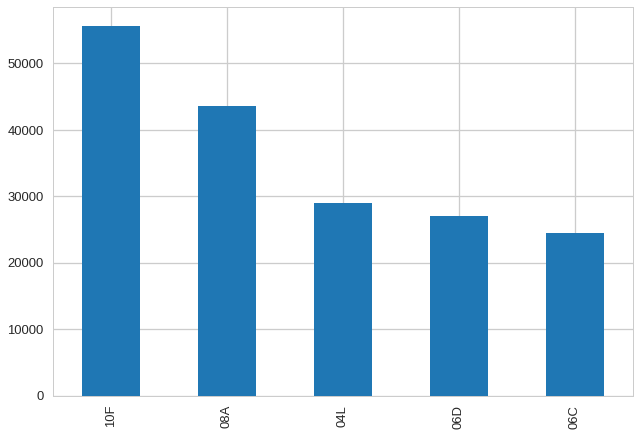

In [32]:
violation_counts[:5].plot(kind='bar')

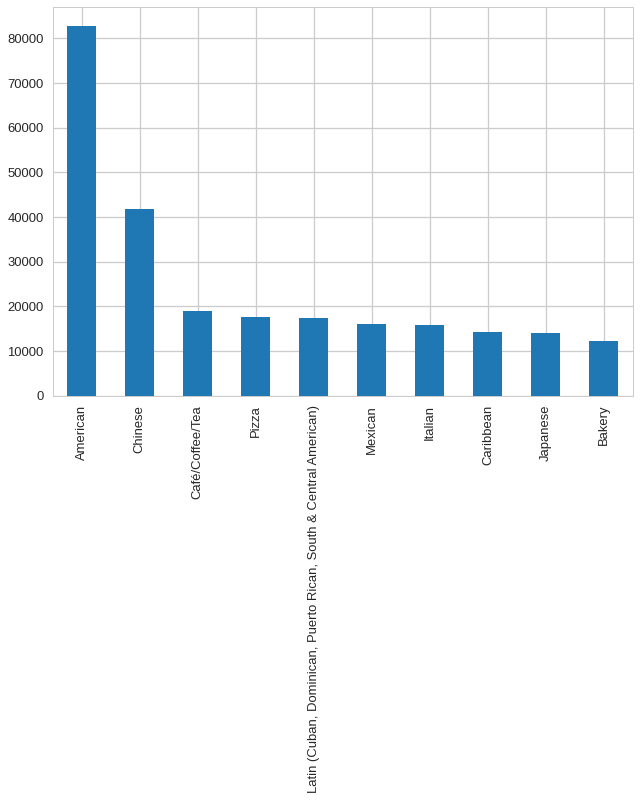

In [33]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular[:10].plot(kind='bar')

### Selecting rows

To select rows, we can use the following approach, where we generate a list of boolean values, one for each row of the dataframe, and then we use the list to select which of the rows of the dataframe we want to keep"

In [34]:
# Create the condition "has mice" for code 04L
mice = (restaurants["VIOLATION CODE"] == "04L")
mice

0         False
1         False
2         False
3         False
4         False
          ...  
394719    False
394720    False
394721    False
394722    False
394723     True
Name: VIOLATION CODE, Length: 394724, dtype: bool

In [35]:
# Apply the condition to the dataframe "restaurants" and store the result 
# in a dataframe called  has_mice
has_mice = restaurants[mice]
has_mice

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
13,50014362,URUBAMBA,Queens,8620,37TH AVE,11372,7186722224,Peruvian,2019-10-02,Establishment Closed by DOHMH. Violations wer...,04L,Evidence of mice or live mice present in facil...,Y,45.0,NaN,NaT,2019-10-26,Cycle Inspection / Initial Inspection,40.750153541975,-73.880319400676,403,21,027900,4036257,4014740001,QN28
29,50035483,CAFE KASHKAR,Brooklyn,1141,BRIGHTON BEACH AVE,11235,7187433832,Turkish,2017-10-25,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,13.0,A,2017-10-25,2019-10-26,Cycle Inspection / Re-inspection,40.577591047209,-73.955556572692,313,48,061004,3245670,3087177501,BK19
50,41655252,CHINA TOP,Bronx,3563,BOSTON RD,10469,7184055550,Chinese,2018-11-29,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,13.0,A,2018-11-29,2019-10-26,Cycle Inspection / Initial Inspection,40.878227012665,-73.844371082316,212,12,038600,2097013,2047280035,BX03
64,40363630,LORENZO & MARIA'S KITCHEN,Manhattan,1418,THIRD AVENUE,10028,2127941080,Continental,2018-02-21,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,32.0,NaN,NaT,2019-10-26,Cycle Inspection / Initial Inspection,40.775281106431,-73.95657589237,108,05,014000,1047523,1015090035,MN40
92,41676787,CHOBANI SOHO,Manhattan,150,PRINCE STREET,10012,6073371246,American,2019-07-12,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,9.0,A,2019-07-12,2019-10-26,Cycle Inspection / Re-inspection,40.725836962282,-74.001064319466,102,01,004900,1007733,1005020023,MN24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394629,50070322,INDIAN CURRY HEIGHTS,Brooklyn,125,RALPH AVE,11221,7189287707,Indian,2019-09-18,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,40.0,NaN,2019-09-18,2019-10-26,Cycle Inspection / Re-inspection,40.685773324163,-73.923274585543,303,41,037500,3039836,3014870002,BK35
394631,41116575,GENEROSO BAKERY,Brooklyn,5812,5 AVENUE,11220,7184920895,Bakery,2018-03-15,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,12.0,A,2018-03-15,2019-10-26,Cycle Inspection / Initial Inspection,40.640492696091,-74.015122757887,307,38,007400,3016008,3008550041,BK32
394696,50073615,PIZZA MERCATO,Manhattan,11,WAVERLY PL,10003,2124208432,Pizza,2018-04-17,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,9.0,A,2018-04-17,2019-10-26,Pre-permit (Operational) / Re-inspection,40.730033566227,-73.994172933544,102,01,005900,1008838,1005480040,MN23
394707,50008878,GENARO'S PIZZERIA AND RESTAURANT,Queens,1812,COLLEGE POINT BLVD,11356,7183091096,Pizza/Italian,2018-01-24,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,12.0,A,2018-01-24,2019-10-26,Cycle Inspection / Re-inspection,40.782972727419,-73.845876479734,407,19,092500,4098307,4040830025,QN23


In [36]:
# List the most frequent DBA values in the dataframe
has_mice["DBA"].value_counts()[:20]

SUBWAY                                   238
DUNKIN'                                  141
KENNEDY FRIED CHICKEN                    123
CROWN FRIED CHICKEN                      112
STARBUCKS                                 84
GOLDEN KRUST CARIBBEAN BAKERY & GRILL     69
POPEYES                                   68
MCDONALD'S                                66
BURGER KING                               59
DUNKIN', BASKIN ROBBINS                   57
DOMINO'S                                  49
LE PAIN QUOTIDIEN                         36
KFC                                       36
LITTLE CAESARS                            35
CARVEL ICE CREAM                          35
AMC THEATRES                              29
VIVI BUBBLE TEA                           27
EMPANADAS MONUMENTAL                      23
CHECKERS                                  22
IHOP                                      21
Name: DBA, dtype: int64

In [37]:
has_mice["CAMIS"].value_counts()[:5]

50016943    13
50015263    12
40423819    12
50046623    12
50058969    12
Name: CAMIS, dtype: int64

In [38]:
condition = (restaurants["CAMIS"] == '41430594')
restaurants[condition]


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
16820,41430594,1 STOP PATTY SHOP,Manhattan,1708,AMSTERDAM AVENUE,10031,2124917466,Bakery,2016-07-22,Establishment re-opened by DOHMH,04L,Evidence of mice or live mice present in facil...,Y,7.0,NaN,2016-07-22,2019-10-26,Cycle Inspection / Reopening Inspection,40.824869602416,-73.947878825434,109,07,022900,1084345,1020760031,MN04
32381,41430594,1 STOP PATTY SHOP,Manhattan,1708,AMSTERDAM AVENUE,10031,2124917466,Bakery,2017-03-15,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,9.0,A,2017-03-15,2019-10-26,Cycle Inspection / Initial Inspection,40.824869602416,-73.947878825434,109,07,022900,1084345,1020760031,MN04
82176,41430594,1 STOP PATTY SHOP,Manhattan,1708,AMSTERDAM AVENUE,10031,2124917466,Bakery,2017-03-15,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,9.0,A,2017-03-15,2019-10-26,Cycle Inspection / Initial Inspection,40.824869602416,-73.947878825434,109,07,022900,1084345,1020760031,MN04
87350,41430594,1 STOP PATTY SHOP,Manhattan,1708,AMSTERDAM AVENUE,10031,2124917466,Bakery,2016-09-07,Establishment Closed by DOHMH. Violations wer...,05F,Insufficient or no refrigerated or hot holding...,Y,48.0,NaN,NaT,2019-10-26,Cycle Inspection / Re-inspection,40.824869602416,-73.947878825434,109,07,022900,1084345,1020760031,MN04
93684,41430594,1 STOP PATTY SHOP,Manhattan,1708,AMSTERDAM AVENUE,10031,2124917466,Bakery,2016-09-07,Establishment Closed by DOHMH. Violations wer...,10F,Non-food contact surface improperly constructe...,N,48.0,NaN,NaT,2019-10-26,Cycle Inspection / Re-inspection,40.824869602416,-73.947878825434,109,07,022900,1084345,1020760031,MN04
93749,41430594,1 STOP PATTY SHOP,Manhattan,1708,AMSTERDAM AVENUE,10031,2124917466,Bakery,2016-07-14,Establishment Closed by DOHMH. Violations wer...,10H,Proper sanitization not provided for utensil w...,N,30.0,NaN,NaT,2019-10-26,Cycle Inspection / Initial Inspection,40.824869602416,-73.947878825434,109,07,022900,1084345,1020760031,MN04
94182,41430594,1 STOP PATTY SHOP,Manhattan,1708,AMSTERDAM AVENUE,10031,2124917466,Bakery,2016-07-14,Establishment Closed by DOHMH. Violations wer...,04N,Filth flies or food/refuse/sewage-associated (...,Y,30.0,NaN,NaT,2019-10-26,Cycle Inspection / Initial Inspection,40.824869602416,-73.947878825434,109,07,022900,1084345,1020760031,MN04
119992,41430594,1 STOP PATTY SHOP,Manhattan,1708,AMSTERDAM AVENUE,10031,2124917466,Bakery,2019-03-27,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Y,10.0,A,2019-03-27,2019-10-26,Cycle Inspection / Initial Inspection,40.824869602416,-73.947878825434,109,07,022900,1084345,1020760031,MN04
178374,41430594,1 STOP PATTY SHOP,Manhattan,1708,AMSTERDAM AVENUE,10031,2124917466,Bakery,2016-09-13,Establishment re-opened by DOHMH,08A,Facility not vermin proof. Harborage or condit...,N,9.0,C,2016-09-13,2019-10-26,Cycle Inspection / Reopening Inspection,40.824869602416,-73.947878825434,109,07,022900,1084345,1020760031,MN04
178767,41430594,1 STOP PATTY SHOP,Manhattan,1708,AMSTERDAM AVENUE,10031,2124917466,Bakery,2016-09-07,Establishment Closed by DOHMH. Violations wer...,02G,Cold food item held above 41º F (smoked fish a...,Y,48.0,NaN,NaT,2019-10-26,Cycle Inspection / Re-inspection,40.824869602416,-73.947878825434,109,07,022900,1084345,1020760031,MN04


And we can use more complex conditions:

In [48]:
mice_manhattan = (restaurants["VIOLATION CODE"] == "04L") \
                    & (restaurants["BORO"] == "Manhattan")\
                    & (restaurants["ZIPCODE"] == "10012") 
                    

In [49]:
has_mice_10012 = restaurants[mice_manhattan]
has_mice_10012

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
92,41676787,CHOBANI SOHO,Manhattan,150,PRINCE STREET,10012,6073371246,American,2019-07-12,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,9.0,A,2019-07-12,2019-10-26,Cycle Inspection / Re-inspection,40.725836962282,-74.001064319466,102,01,004900,1007733,1005020023,MN24
7389,50004221,INSOMNIA COOKIES,Manhattan,116,MACDOUGAL ST,10012,8776326654,Bakery,2018-09-14,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,12.0,A,2018-09-14,2019-10-26,Cycle Inspection / Initial Inspection,40.729696105789,-74.00072522254,102,01,006500,1008694,1005400007,MN23
8692,41722632,CAFE HABANA/CAFE HABANA TO GO,Manhattan,17,PRINCE STREET,10012,2126252001,"Latin (Cuban, Dominican, Puerto Rican, South &...",2017-06-30,Establishment Closed by DOHMH. Violations wer...,04L,Evidence of mice or live mice present in facil...,Y,20.0,NaN,NaT,2019-10-26,Cycle Inspection / Initial Inspection,40.72277091925,-73.994260155704,102,01,004300,1007909,1005080046,MN24
8842,50078380,JUICE PRESS,Manhattan,156,PRINCE ST,10012,6462854078,"Juice, Smoothies, Fruit Salads",2018-08-10,Establishment Closed by DOHMH. Violations wer...,04L,Evidence of mice or live mice present in facil...,Y,83.0,NaN,NaT,2019-10-26,Pre-permit (Operational) / Initial Inspection,40.72591930365,-74.001226674804,102,01,004900,1007732,1005020020,MN24
10829,41718160,CARBONE,Manhattan,181,THOMPSON STREET,10012,2129330707,Italian,2017-05-17,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,20.0,NaN,NaT,2019-10-26,Cycle Inspection / Initial Inspection,40.727876328343,-74.000144318937,102,03,006500,1084920,1005257503,MN23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388052,50045947,SPRINGBONE KITCHEN,Manhattan,90,W 3RD ST,10012,6463689192,American,2017-12-06,Establishment Closed by DOHMH. Violations wer...,04L,Evidence of mice or live mice present in facil...,Y,62.0,NaN,NaT,2019-10-26,Cycle Inspection / Initial Inspection,40.729901961802,-73.9990799387,102,01,006500,1008671,1005390014,MN23
388859,50049466,SWEETS BY CHLOE,Manhattan,185,BLEECKER ST,10012,2122908000,Bakery,2017-05-26,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,10.0,A,2017-05-26,2019-10-26,Cycle Inspection / Initial Inspection,40.729078531416,-74.001006642818,102,01,006500,1008715,1005400043,MN23
389629,50036129,BISTROT LEO,Manhattan,60,THOMPSON ST,10012,2122198119,American,2018-09-04,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,25.0,B,2018-09-04,2019-10-26,Cycle Inspection / Re-inspection,40.724176338947,-74.0031964863,102,01,004700,1087362,1004880003,MN24
390652,50079043,DOMODOMO KITCHEN/ RAW BAR,Manhattan,138-140,W HOUSTON ST,10012,6467070301,Seafood,2018-06-05,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,33.0,NaN,NaT,2019-10-26,Pre-permit (Operational) / Initial Inspection,40.727821420367,-74.001710177992,102,03,006500,1008338,1005260079,MN23


In [50]:
has_mice_10012["DBA"].value_counts()[:20]

LITTLE CUPCAKE BAKE SHOP        10
CHACHIS                          8
THINK COFFEE                     7
SPRINGBONE KITCHEN               7
COCO & CRU/SWEETWATER SOCIAL     7
DANTE                            6
INSOMNIA COOKIES                 6
EGG SHOP                         6
MONTE'S                          6
PICCOLA CUCINA                   5
BANTER                           5
TRIONA'S                         5
LITTLE RASCAL                    5
THE RED LION                     5
THE GRISLY PEAR                  5
ANGELIKA FILM CENTER             5
GO ZEN RESTAURANT                5
BAO TEA HOUSE                    5
GROOVE                           5
GATSBY'S                         5
Name: DBA, dtype: int64

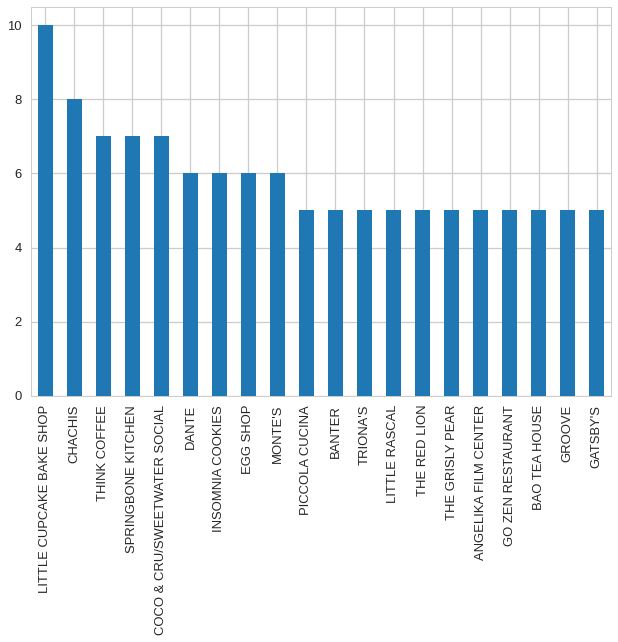

In [51]:
has_mice_10012["DBA"].value_counts()[:20].plot(kind='bar')

### Pivot Tables

[Pivot tables](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) is one of the most commonly used exploratory tools, and in Pandas they are extremely flexible. 

For example, let's try to count the number of restaurants that are inspected every day. 

In [52]:
pivot = pd.pivot_table(
    data = restaurants, 
    index = 'INSPECTION DATE', 
    values = 'CAMIS', 
    aggfunc = 'count'
)

In [53]:
pivot

,CAMIS
INSPECTION DATE,
1900-01-01,1504
2013-06-04,10
2013-06-07,1
2013-06-20,9
2013-06-24,3
...,...
2019-10-19,101
2019-10-21,800
2019-10-22,875


##### Changing date granularity 

We can also use the `[resample](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html)` command to change the frequency from one day, to, say, 7 days.

In [54]:
pivot.resample('7D').mean()

,CAMIS
INSPECTION DATE,
1900-01-01,1504.000000
1900-01-08,NaN
1900-01-15,NaN
1900-01-22,NaN
1900-01-29,NaN
...,...
2019-09-23,514.714286
2019-09-30,571.666667
2019-10-07,592.666667


Now, let's plot this. By default, Pandas considers the "index" column to be the x-axis, and plots the rest.

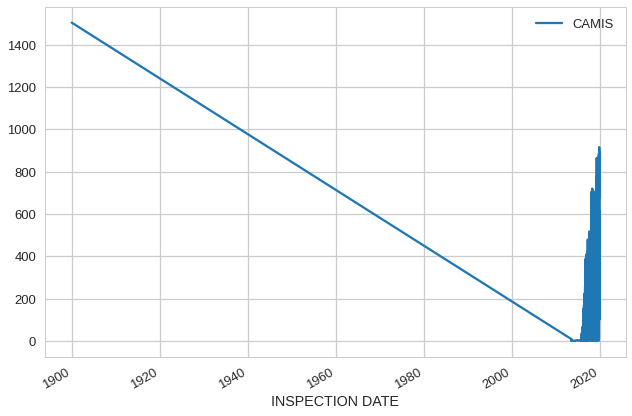

In [55]:
pivot.plot()

#### Deleting rows from a DataFrame

Hm, that '1900-01-01' line is messing things up. Let's delete it, using the `drop` command. Notice a few things:
* We use the `pd.to_datetime` command to convert the '1900-01-01' string into a datetime data type.
* We use the `axis=0` parameter means that we delete a **row** with that index value. (The `axis=1` means that we delete a column.)
* The `inplace=True` means that we change directly the dataframe, instead of returning a new dataframe that does not have the deleted value.

In [56]:
pivot.drop(pd.to_datetime('1900-01-01'), axis=0, inplace=True) 

And let's plot again.

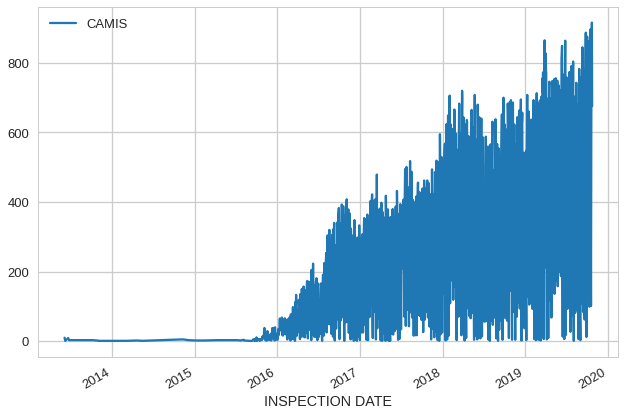

In [57]:
pivot.plot()

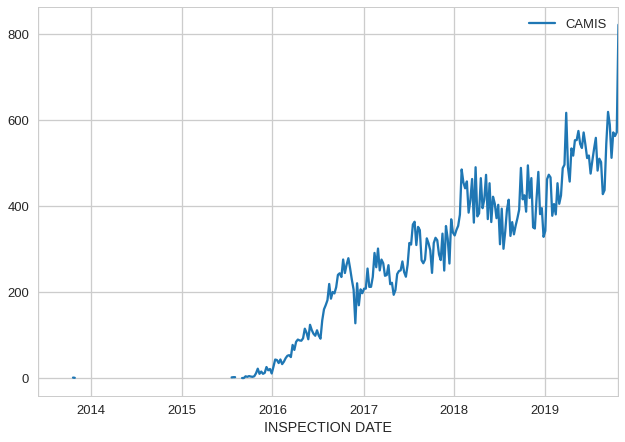

In [58]:
pivot.resample('7D').mean().plot()

#### Pivot Table with two (or more) variables)

We would like to break down the results by borough, so we add the `columns` parameter.

In [59]:
pivot2 = pd.pivot_table(
    data = restaurants, #
    index = 'INSPECTION DATE', 
    columns = 'BORO', 
    values = 'CAMIS', 
    aggfunc = 'count'
)

In [60]:
pivot2.head(10)

BORO,0,Bronx,Brooklyn,Manhattan,Queens,Staten Island
INSPECTION DATE,,,,,,
1900-01-01,14.0,92.0,384.0,675.0,297.0,42.0
2013-06-04,NaN,NaN,10.0,NaN,NaN,NaN
2013-06-07,NaN,NaN,NaN,1.0,NaN,NaN
2013-06-20,NaN,NaN,9.0,NaN,NaN,NaN
2013-06-24,NaN,NaN,3.0,NaN,NaN,NaN
2013-10-08,NaN,NaN,3.0,NaN,NaN,NaN
2013-10-22,NaN,NaN,2.0,NaN,NaN,NaN
2013-10-29,NaN,NaN,2.0,NaN,NaN,NaN
2013-11-01,NaN,NaN,1.0,NaN,NaN,NaN


##### Deleting rows and columns

Now, you will notice that there are a few columns and rows that are just noise. The first row with date *'1900-01-01'* is clearly noise, and the *'0'* columns the same. We can use the `drop` command of Pandas to drop these.

In [65]:
# The "axis=0" means that we delete a row with that index value
pivot2 = pivot2.drop(pd.to_datetime('1900-01-01'), axis=0) 

KeyError: ignored

In [66]:
# The "axis=1" means that we delete a columns with that value
pivot2 = pivot2.drop('0', axis=1)

KeyError: ignored

In [67]:
pivot2

BORO,Bronx,Brooklyn,Manhattan,Queens,Staten Island
INSPECTION DATE,,,,,
2013-06-04,NaN,10.0,NaN,NaN,NaN
2013-06-07,NaN,NaN,1.0,NaN,NaN
2013-06-20,NaN,9.0,NaN,NaN,NaN
2013-06-24,NaN,3.0,NaN,NaN,NaN
2013-10-08,NaN,3.0,NaN,NaN,NaN
...,...,...,...,...,...
2019-10-19,NaN,82.0,12.0,7.0,NaN
2019-10-21,58.0,206.0,399.0,113.0,24.0
2019-10-22,89.0,211.0,292.0,244.0,39.0


### Exercise 

Now let's do the same exercise, but instead of counting the number of inspections, we want to compute the average score assigned by the inspectors. Hint: We will need to change the `values` and the `aggfunc` parameters in the `pivot_table` function above.

In [ ]:
# your code here

### Exercise

* We interacted with the NYC Restaurant Inspection Data. Now, let's download another dataset, and do some analysis. We will focus on the [NYPD Vehicle Collisions](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95/data) data set.


* Task 1: Download the dataset. Use the "Export" view, get the URL for the CSV file, and download it using curl. (See the top of the notebook for guidance.) 



* Task 2: Find out the most common contributing factors to the collisions. 
 

   
* Task 3: Break down the number of collisions by borough.





* Task 4: Find out the how many collisions had 0 persons injured, 1 persons injured, etc. persons injured in each accident. Use the `value_counts()` approach. You may also find the `.plot(logy=True)` option useful when you create the plot to make the y-axis logarigthmic.
 

   
* Task 5: Break down the accidents by borough and contributing factor. Use the `pivot_table` function of Pandas
 

 * Task 6: Find the dates with the most accidents. Can you figure out what happened on these days? 



* Task 7: Plot the number of accidents per day. (Hint: Ensure that your date column is in the right datatype and that it is properly sorted, before plotting)


* Task 8: Plot the accidents in map. Use a scatter plot using the `plot(kind='scatter', x=..., y=....)` command, and use the `LATITUDE` and `LONGITUDE` parameters. (Hint: You may have to delete bad data points before getting into the right visual result.)

* Task 9: Plot the accidents in map as above, but limit the data only to accidents with at least one injury.